In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from apikey import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#Generate Cities List

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

587

In [3]:
#Creating a df to collect the API results in
cities_df = pd.DataFrame()
cities_df["City"] = ""
cities_df["Cloudiness"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""
cities_df["Humidity"] = ""
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Max Temp"] = ""
cities_df["Wind Speed"] = ""

In [4]:
#Perform API Calls

base_url = "http://api.openweathermap.org/data/2.5/weather?"

params = {
    "APPID" :api_key,
     "units": "imperial"
}

cities_count = 0


for city in cities:
    
    #setting the q parameter to the current city name for the API call
    params["q"] = city
    
    #keeping track of the index
    cities_count = cities_count + 1
    
    #Make API call and print out city name and number
    print(f"Processing Record {cities_count}|{city}.")
    response = requests.get(base_url, params=params).json()
    
    #Adding API response into the cities DataFrame
    try:
        
        cities_df.loc[cities_count, 'City'] = response['name']
        cities_df.loc[cities_count, 'Cloudiness'] = response['clouds']['all']
        cities_df.loc[cities_count, 'Country'] = response['sys']["country"]
        cities_df.loc[cities_count, 'Date'] = response['dt']
        cities_df.loc[cities_count, 'Humidity'] = response['main']['humidity']
        cities_df.loc[cities_count, 'Lat'] = response['coord']['lat']
        cities_df.loc[cities_count, 'Lng'] = response['coord']['lon']
        cities_df.loc[cities_count, 'Max Temp'] = response['main']['temp_max']
        cities_df.loc[cities_count, 'Wind Speed'] = response['wind']['speed']
    
    except:
        print("City not found... skipping.")



Processing Record 1|abu kamal.
Processing Record 2|mount gambier.
Processing Record 3|qaanaaq.
Processing Record 4|avarua.
Processing Record 5|hermanus.
Processing Record 6|kavieng.
Processing Record 7|bluff.
Processing Record 8|punta arenas.
Processing Record 9|dingle.
Processing Record 10|vaini.
Processing Record 11|ranong.
Processing Record 12|kodiak.
Processing Record 13|rikitea.
Processing Record 14|sentyabrskiy.
City not found... skipping.
Processing Record 15|luderitz.
Processing Record 16|orcopampa.
Processing Record 17|constitucion.
Processing Record 18|cascais.
Processing Record 19|mandalgovi.
Processing Record 20|mill valley.
Processing Record 21|hilo.
Processing Record 22|harper.
Processing Record 23|old town.
Processing Record 24|jamestown.
Processing Record 25|khatanga.
Processing Record 26|ushuaia.
Processing Record 27|salamiyah.
Processing Record 28|nizhneyansk.
City not found... skipping.
Processing Record 29|vaitupu.
City not found... skipping.
Processing Record 30|zi

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))

In [8]:
#Export dataframe to csv
cities_df.to_csv(output_data_file)

#Display the dataframe
cities_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Abu Kamal,100,SY,1577936966,66,34.45,40.92,49.35,7.31
2,Mount Gambier,40,AU,1577936966,46,-37.83,140.78,73.4,9.17
3,Qaanaaq,98,GL,1577936966,87,77.48,-69.36,-35.63,6.6
4,Avarua,76,CK,1577936967,78,-21.21,-159.78,80.6,18.34
5,Hermanus,67,ZA,1577936967,95,-34.42,19.24,63,14.36
...,...,...,...,...,...,...,...,...,...
200,Las Palmas,78,CO,1577937076,89,9.27,-75.33,76.35,6.08
201,Eyl,0,SO,1577937076,82,7.98,49.82,78.01,18.75
203,Athabasca,70,CA,1577937078,91,54.72,-113.29,18.27,1.25
204,Tuktoyaktuk,90,CA,1577937078,76,69.44,-133.03,-5.8,14.99


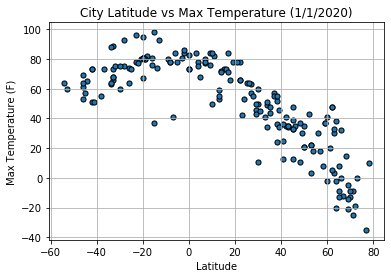

<Figure size 432x288 with 0 Axes>

In [38]:
#Plotting the Data

#Latitude vs. Temperature Plot

#Create a new df with lat and max temp as the type integers
lat_maxtemp = cities_df[["Lat", "Max Temp"]].astype(int)

#Plot a scatterplot with x as latitute and y as max temperature
lat_maxtemp_plot = lat_maxtemp.plot(kind="scatter", x = "Lat", y = "Max Temp", s=26, edgecolors='black')

#Adding chart title, axis labels, and grid lines
plt.title("City Latitude vs Max Temperature (1/1/2020)")

lat_maxtemp_plot.set_xlabel("Latitude")
lat_maxtemp_plot.set_ylabel("Max Temperature (F)")  

lat_maxtemp_plot.grid()

plt.show()
plt.tight_layout()

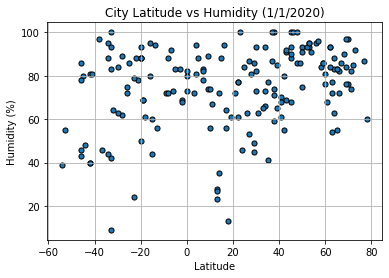

<Figure size 432x288 with 0 Axes>

In [40]:
#Plotting the Data

#Latitude vs. Humidity Plot

#Create a new df with lat and humidity as the type integers
lat_humidity = cities_df[["Lat", "Humidity"]].astype(int)

#Plot a scatterplot with x as latitute and y as humidity
lat_hum_plot = lat_humidity.plot(kind="scatter", x = "Lat", y = "Humidity", s=26, edgecolors='black')

#Adding chart title, axis labels, and grid lines
plt.title("City Latitude vs Humidity (1/1/2020)")

lat_hum_plot.set_xlabel("Latitude")
lat_hum_plot.set_ylabel("Humidity (%)")  

lat_hum_plot.grid()

plt.show()
plt.tight_layout()

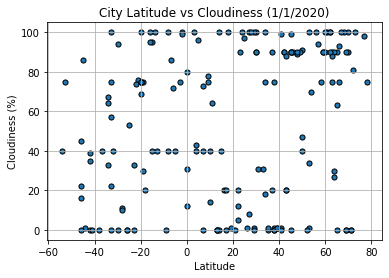

<Figure size 432x288 with 0 Axes>

In [41]:
#Plotting the Data

#Latitude vs. Cloudiness Plot

#Create a new df with lat and cloudiness as the type integers
lat_cloud = cities_df[["Lat", "Cloudiness"]].astype(int)

#Plot a scatterplot with x as latitute and y as cloudiness
lat_cloud_plot = lat_cloud.plot(kind="scatter", x = "Lat", y = "Cloudiness", s=26, edgecolors='black')

#Adding chart title, axis labels, and grid lines
plt.title("City Latitude vs Cloudiness (1/1/2020)")

lat_cloud_plot.set_xlabel("Latitude")
lat_cloud_plot.set_ylabel("Cloudiness (%)")  

lat_cloud_plot.grid()

plt.show()
plt.tight_layout()

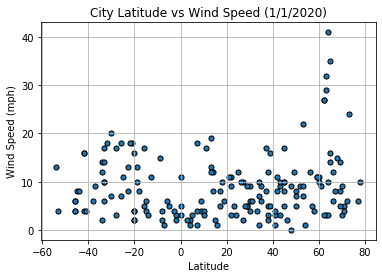

<Figure size 432x288 with 0 Axes>

In [42]:
#Plotting the Data

#Latitude vs. Wind Speed Plot

#Create a new df with lat and humidity as the type integers
lat_wind = cities_df[["Lat", "Wind Speed"]].astype(int)

#Plot a scatterplot with x as latitute and y as humidity
lat_wind_plot = lat_wind.plot(kind="scatter", x = "Lat", y = "Wind Speed", s=26, edgecolors='black')

#Adding chart title, axis labels, and grid lines
plt.title("City Latitude vs Wind Speed (1/1/2020)")

lat_wind_plot.set_xlabel("Latitude")
lat_wind_plot.set_ylabel("Wind Speed (mph)")  

lat_wind_plot.grid()

plt.show()
plt.tight_layout()

In [20]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

params = {
    "APPID" :api_key,
    "q": "San Francisco",
     "units": "imperial" 
}

result =requests.get(base_url, params=params).json()
result

{'coord': {'lon': -76.88, 'lat': 1.17},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 66.2,
  'feels_like': 68.74,
  'temp_min': 66.2,
  'temp_max': 66.2,
  'pressure': 1019,
  'humidity': 88},
 'visibility': 10000,
 'wind': {'speed': 3.06, 'deg': 321},
 'clouds': {'all': 75},
 'dt': 1577923659,
 'sys': {'type': 1,
  'id': 8592,
  'country': 'CO',
  'sunrise': 1577876947,
  'sunset': 1577920341},
 'timezone': -18000,
 'id': 3669881,
 'name': 'San Francisco',
 'cod': 200}

In [28]:
result['wind']['speed']

3.06